In [2]:
from dlisio import dlis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [4]:
import dlisio
dlisio.__version__

'0.3.6'

## Loading DLIS Files

As we are working with single DLIS File, we can use the following code to load the files. A physical DLIS can contain multiple logical files, therefore, using this syntax allows the first file to be output to f and any subsequent logical files placed into tail.

In [5]:
f, *tail = dlis.load(r'C:\Jimmy\Codeholic\ongc-wire\science\DLIS\206_05a-_3_DWL_DWL_WIRE_258276498.DLIS')

We can see contents of each , by calling f we can see the o/p as below and tail is blank list so we know that there are no logical files within the DLIS

In [6]:
print(f)

LogicalFile(MSCT_197LTP)


In [7]:
f.frames
for i in f.frames:
    print(i)


Frame(2000T)
Frame(800T)


In [8]:
frame1 = f.object('FRAME' , '800T')
frame1

Frame(800T)

In [ ]:
curves = frame1.curves()
depth = curves['TDEP']* 0.00254
curves

In [ ]:
curves.dtype
# for i in curves.dtype:
#     print(i)

In [58]:
curves.dtype['RHV']

dtype('float32')

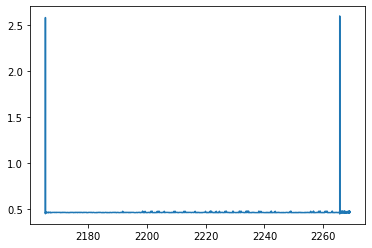

In [56]:
rcpp = curves['RCPP']
plt.plot(depth, rcpp)

In [11]:
print(tail)

[]


In [51]:
# view methods on f
f.channels                 

[Channel(TDEP),
 Channel(TDEP),
 Channel(TDEP),
 Channel(TDEP),
 Channel(TDEP),
 Channel(TDEP),
 Channel(TIME),
 Channel(TIME),
 Channel(TIME),
 Channel(TIME),
 Channel(TIME),
 Channel(TIME),
 Channel(BS),
 Channel(CS),
 Channel(CVEL),
 Channel(TENS),
 Channel(ETIM),
 Channel(ETIM),
 Channel(MARK),
 Channel(LMVL_DL),
 Channel(UMVL_DL),
 Channel(RCMD_DL),
 Channel(CMDV_DL),
 Channel(RCPP_DL),
 Channel(CMPP_DL),
 Channel(RCMP_DL),
 Channel(CMPR_DL),
 Channel(DCFL_DL),
 Channel(DFS_DL),
 Channel(DZER_DL),
 Channel(RHMD_DL),
 Channel(HMDV_DL),
 Channel(RHPP_DL),
 Channel(HPPR_DL),
 Channel(RHV_DL),
 Channel(HV_DL),
 Channel(RRPP_DL),
 Channel(RPPV_DL),
 Channel(RLSW_DL),
 Channel(LSWI_DL),
 Channel(RSCU_DL),
 Channel(SCUR_DL),
 Channel(SMSC_DL),
 Channel(RSTS_DL),
 Channel(SSTA_DL),
 Channel(UCFL_DL),
 Channel(CARC_DL),
 Channel(CMCU_DL),
 Channel(HMCU_DL),
 Channel(CMLP_DL),
 Channel(ECGR),
 Channel(GHD),
 Channel(BHRM),
 Channel(BHPR),
 Channel(GTEM),
 Channel(TEMP),
 Channel(EHGR),
 Cha

To view the high level contents we can use .describe(). This will return information abt the no of frames, channels and objects within the file.We can see 2 frames and 104 channels (logging curves).

In [13]:
f.describe()

------------
Logical File
------------
Description : LogicalFile(MSCT_197LTP)
Frames      : 2
Channels    : 104

Known objects
--
CALIBRATION-COEFFICIENT : 24
CALIBRATION-MEASUREMENT : 6
ORIGIN                  : 1
PROCESS                 : 1
CHANNEL                 : 104
FRAME                   : 2
FILE-HEADER             : 1
CALIBRATION             : 27
PARAMETER               : 226
TOOL                    : 2
EQUIPMENT               : 14

Unknown objects
--
440-OP-CORE_TABLES           : 250
440-PRESENTATION-DESCRIPTION : 1
440-OP-CHANNEL               : 104
440-OP-CORE_REPORT_FORMAT    : 17
440-CHANNEL                  : 96


## Viewing the file's Metadata

Data Origin : Source of the data

In [14]:
origin , *origin_tail = f.origins

In [15]:
origin

Origin(DLIS_DEFINING_ORIGIN)

In [16]:
origin_tail

[]

In [17]:
origin.describe()

------
Origin
------
name   : DLIS_DEFINING_ORIGIN
origin : 2
copy   : 0

Logical file ID          : MSCT_197LTP
File set name and number : FAROE_PETROLEUM/206_05A-3 / 41
File number and type     : 167 / STATION LOG

Field                   : Fulla
Well (id/name)          :  / 206/05a-3
Produced by (code/name) : 440 / Schlumberger
Produced for            : Faroe Petroleum
Order number            : BSAX-00003
Run number              : 1
Descent number          : -1
Created                 : 2011-08-20 22:48:50

Created by              : OP, (version: 19C0-187)
Other programs/services : MSCT: Mechanical Sidewall Coring Tool SGTP:
                          Scintillation Gamma-Ray - P     LEHQT: Logging
                          Equipment Head - QT    WELLCAD: WellCAD file generator


## Frames

Frames within a DLIS file can represent logging passes or different stages of data such as raw well log measurements to petrophysical interpretations or processed data. Each frame has a number of properties 

In [18]:
f.frames

[Frame(2000T), Frame(800T)]

In [19]:
#loop over each frame within the file
for frame in f.frames:

        # Search through the channels for the index aqnd obtain the units
        for channel in frame.channels:
            if channel.name == frame.index:
                depth_units = channel.units
                
        print(f'Frame Name: \t\t {frame.name}')
        print(f'Index Type: \t\t {frame.index_type}')
        print(f'Depth Interval: \t {frame.index_min} - {frame.index_max} {depth_units}')
        print(f'Depth Spacing: \t\t {frame.spacing} {depth_units}')
        print(f'Direction: \t\t {frame.direction}')
        print(f'Num of Channels: \t {len(frame.channels)}')
        print(f'Channel Names: \t {str(frame.channels)}')
        print('\n\n')

Frame Name: 		 2000T
Index Type: 		 TIME
Depth Interval: 	 33354518 - 35194520 ms
Depth Spacing: 		 2000 ms
Direction: 		 INCREASING
Num of Channels: 	 4
Channel Names: 	 [Channel(TIME), Channel(TDEP), Channel(TENS_SL), Channel(DEPT_SL)]



Frame Name: 		 800T
Index Type: 		 TIME
Depth Interval: 	 33354518 - 35194520 ms
Depth Spacing: 		 800 ms
Direction: 		 INCREASING
Num of Channels: 	 43
Channel Names: 	 [Channel(TIME), Channel(TDEP), Channel(ETIM), Channel(LMVL), Channel(UMVL), Channel(CFLA), Channel(OCD), Channel(RCMD), Channel(RCPP), Channel(CMRT), Channel(RCNU), Channel(DCFL), Channel(DFS), Channel(DZER), Channel(RHMD), Channel(HMRT), Channel(RHV), Channel(RLSW), Channel(MNU), Channel(S1CY), Channel(S2CY), Channel(RSCU), Channel(RSTS), Channel(UCFL), Channel(CARC), Channel(CMDV), Channel(CMPP), Channel(CNU), Channel(HMDV), Channel(HV), Channel(LSWI), Channel(SCUR), Channel(SSTA), Channel(RCMP), Channel(RHPP), Channel(RRPP), Channel(CMPR), Channel(HPPR), Channel(RPPV), Channel(SM

### Parameters within the DLIS file

In [20]:
def summary_dataframe(object, **kwargs):
    #create an empty dataframe
    df = pd.DataFrame()
    
    #Iterate over each of the keyword arguments
    for i, (key,value) in enumerate(kwargs.items()):
        list_of_values =[]
        
        #Iterate over each parameter and get the relevant key
        for items in object:
            #Account for any missing values.
            
            try:
                x = getattr(items, key)
                list_of_values.append(x)
            except:
                list_of_values.append('')
                continue
        
        #Add a new column to our dataframe
        df[value] = list_of_values
        
    # Sort the dataframe  by column 1 and return it
    return df.sort_values(df.columns[0])


        
        
    

The parameters can be accessed by calling upon f.parameters. To access the parameters we can use the attributes name, long_name and values and pass these into summary function

This returns a long table of each of the parameter. The example below is a small section of that table. From it we can see parameters such as bottom log interval, borehole salinity and bottom hole temperature.

In [ ]:
param_df = summary_dataframe(f.parameters, name ='Name', long_name = 'Long Name', values = 'Values')


# Hiding people's name that maybe in parameters.
# These 2 lines can be commented out to show them
mask = param_df['Name'].isin(['R8', 'RR1','WITN','ENGI'])
param_df = param_df[~mask]

param_df

## Channels

The channels within a frame are the individual curves or arrays. To view a quick summary of these, we can pass in a number of attributes to the summary_dataframe() method.

In [ ]:
channels = summary_dataframe(f.channels , name= 'Name', long_name= 'Long Name', values = 'Values')
channels

## Tools

The tools object within the DLIS file contains information relating to the tools that were used to acquire the data. We can get a summary of the tools available by calling upon the summary_dataframe method.

In [ ]:
tools = summary_dataframe(f.tools, name= 'Name', description = 'Description')
tools

In [ ]:
f.tools

As we are looking to plot accoustic waveform data, we can look at the parameters for the MSCT tool. First, we need to grab the object from the dlis and then pass it into the summary_dataframe function

From the returned table, we can view each of the parameters that relate to the tool and the processing of the data

In [25]:
msct = f.object('TOOL', 'MSCT')
msct_params = summary_dataframe(msct.parameters, name = 'Name', long_name= 'Long Name', value = 'Values')

In [ ]:
msct_params

## Working With Data Objects

Now that some of the meta data has been explored, we can now attempt to access the data stored within the file.

In [27]:
frame1 = f.object('FRAME' , '800T')

In [28]:
frame1

Frame(800T)

We can also directly access the channels for a specific curve. However, this can cause confusion when working with frames containing channels/curves with the same name.

In [29]:
bhpr = f.object('CHANNEL', 'BHPR')

#Print out the properties of the channel/curve

print(f'Name: \t\t{bhpr.name}')
print(f'Long Name: \t\t{bhpr.long_name}')
print(f'Units: \t\t{bhpr.units}')
print(f'Dimension: \t\t{bhpr.dimension}')

Name: 		BHPR
Long Name: 		Borehole Pressure
Units: 		psi
Dimension: 		[1]


In [30]:
bs = f.object('CHANNEL', 'BS')

#Print out the properties of the channel/curve

print(f'Name: \t\t{bs.name}')
print(f'Long Name: \t\t{bs.long_name}')
print(f'Units: \t\t{bs.units}')
print(f'Dimension: \t\t{bs.dimension}')

Name: 		BS
Long Name: 		Bit Size
Units: 		in
Dimension: 		[1]


In [31]:
hmdv = f.object('CHANNEL', 'HMDV')

#Print out the properties of the channel/curve

print(f'Name: \t\t{hmdv.name}')
print(f'Long Name: \t\t{hmdv.long_name}')
print(f'Units: \t\t{hmdv.units}')
print(f'Dimension: \t\t{hmdv.dimension}')

Name: 		HMDV
Long Name: 		Hydraulic Motor Downhole Voltage
Units: 		V
Dimension: 		[1]


## Plotting Data

In [32]:
curves = frame1.curves()

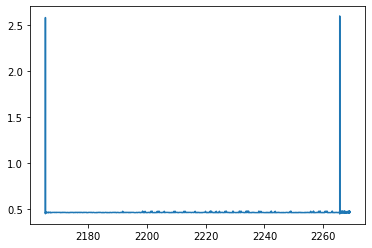

In [33]:
curves
rcpp = curves['RCPP']
plt.plot(depth, rcpp)

In [34]:
depth = curves['TDEP']* 0.00254
rcpp = curves['RCPP']
rhmd = curves['RHMD']

print(f'{depth.min()} - {depth.max()}')

2165.619140625 - 2268.9921875


In [35]:
rppv = curves['RPPV']

In [36]:
bs = curves['BS']

ValueError: no field of name BS

In [ ]:
rppv

array([ 325.70068,  325.70068,  325.70068, ..., 1681.3625 , 1689.337  ,
       1689.337  ], dtype=float32)

In [ ]:
rcpp

In [ ]:
rhmd

(40.0, 240.0)

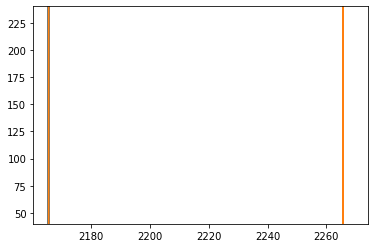

In [ ]:
plt.plot(depth, rppv)
plt.plot(depth,rhmd)
plt.ylim(40, 240)

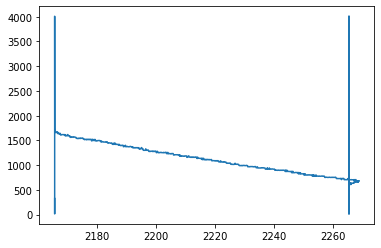

In [ ]:
plt.plot(depth, rppv)

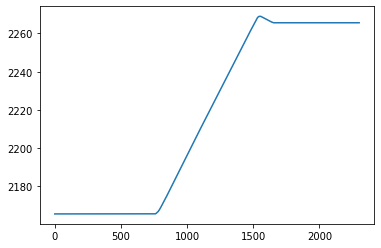

In [ ]:
plt.plot( depth)

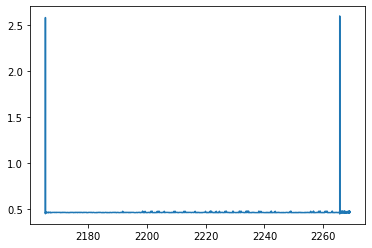

In [ ]:
plt.plot(depth,rcpp)

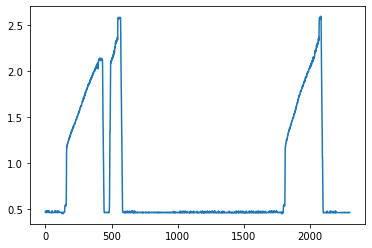

In [ ]:
plt.plot(rcpp)

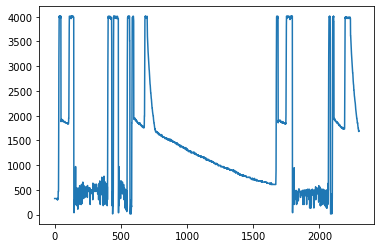

In [ ]:
plt.plot(rppv)

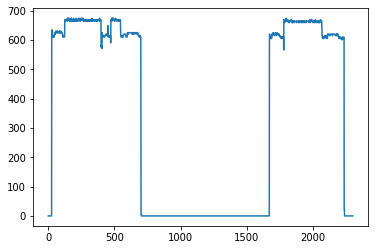

In [ ]:
plt.plot(rhmd)

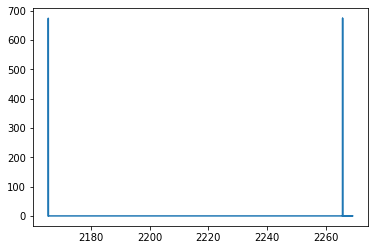

In [ ]:
plt.plot(depth, rhmd)